# Notebook Imports and Packages

In [193]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x +1$$

In [194]:
def f(x):
    return x**2 + x + 1

In [195]:
# Make Data
x_1 = np.linspace(start= -3, stop=3, num = 100)
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

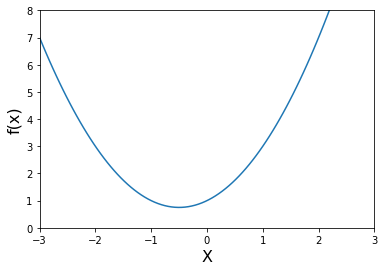

In [196]:
# Plot
plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

# Slope & Derivatives

Challenge: Create a python functioon for the derivative of f(x) called df(x)

In [197]:
def df(x):
    return 2*x+1

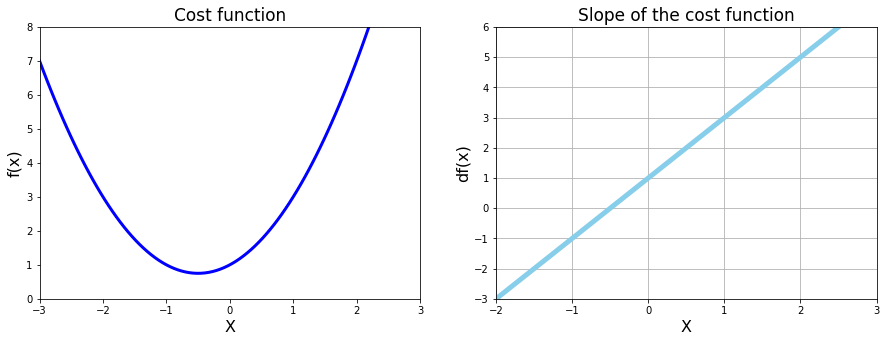

In [198]:
# Plot function and derivatives side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost funciton
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim([-2, 3])
plt.ylim(-3,6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Loops & Gradient Descent

In [199]:
# Gradinent Descent
new_x = 3 
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
   # print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < precision :
        print('Loop ran this many times:', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is :', df(new_x))
print('f(x) value or cost at this point is : ', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is : 7.992587079153068e-05
f(x) value or cost at this point is :  0.7500000015970362


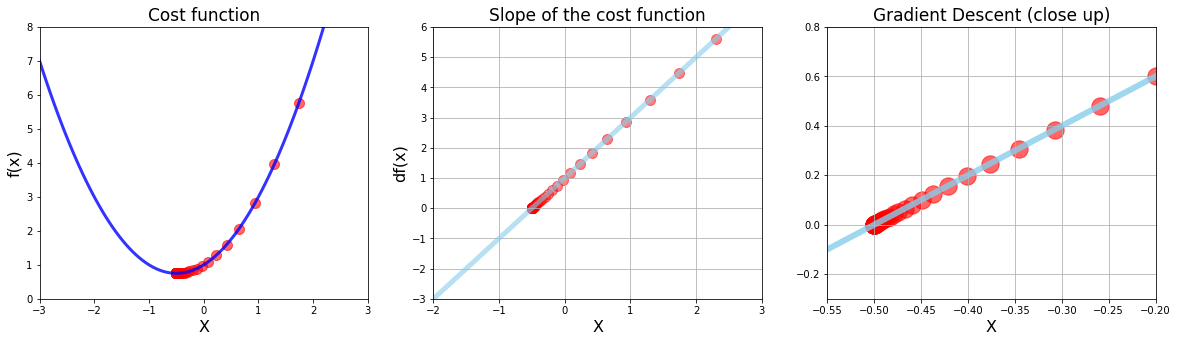

In [200]:
# Superimpose the gradient descent calcualtions on plot

plt.figure(figsize=[20,5])

# 1 Chart: Cost funciton
plt.subplot(1, 3, 1)

plt.xlim([-3, 3])
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color = 'red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim([-2, 3])
plt.ylim(-3,6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)


# 3 Chart: Derivative (close up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)
plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Function

## $$g(x) = x^4 - 4x^2 + 5$$

In [201]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

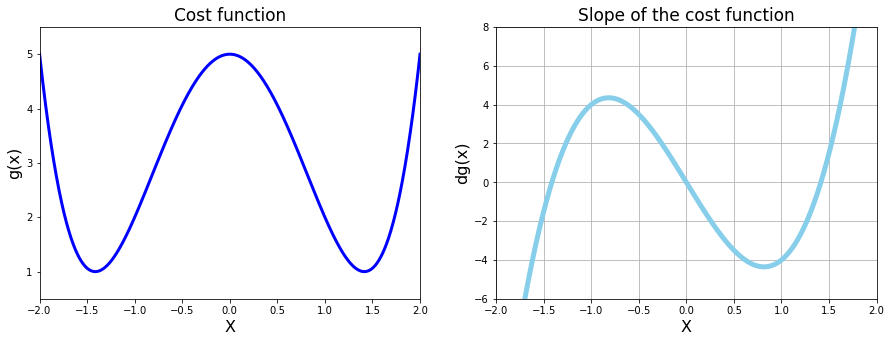

In [202]:
# Plot function and derivatives side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost funciton
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim([-2, 2])
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [203]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    # indentation: ctrl + ]
    new_x = initial_guess 
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision :
            break
    return new_x, x_list, slope_list                                                                                    
    

In [204]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [205]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [206]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


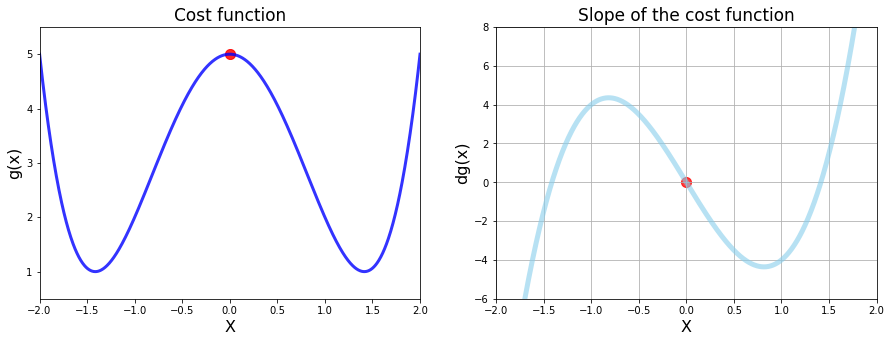

In [207]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)


# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost funciton
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim([-2, 2])
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

## $$ (x) = x^5 - 2x^4 + 2$$

In [208]:
# Make Data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

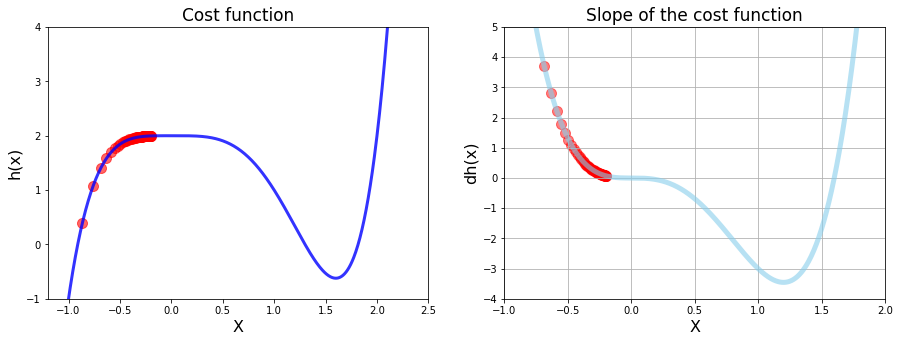

Local min occurs at: -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps:  72


In [209]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess= -0.2, max_iter=71)


# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost funciton
plt.subplot(1, 2, 1)

plt.xlim([-1.2, 2.5])
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim([-1, 2])
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at:' , local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [210]:
import sys
# sys.version
# help(sys)
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

# Learning Rate

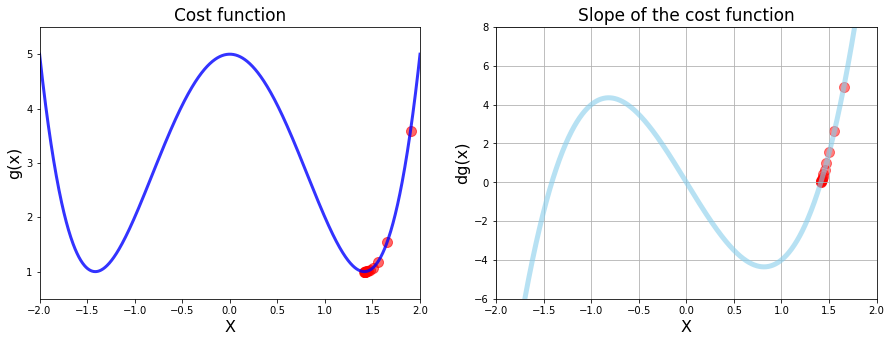

Number of steps is:  14


In [211]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9, multiplier=0.02, max_iter=500)


# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost funciton
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim(0.5, 5.5)
 
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim([-2, 2])
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

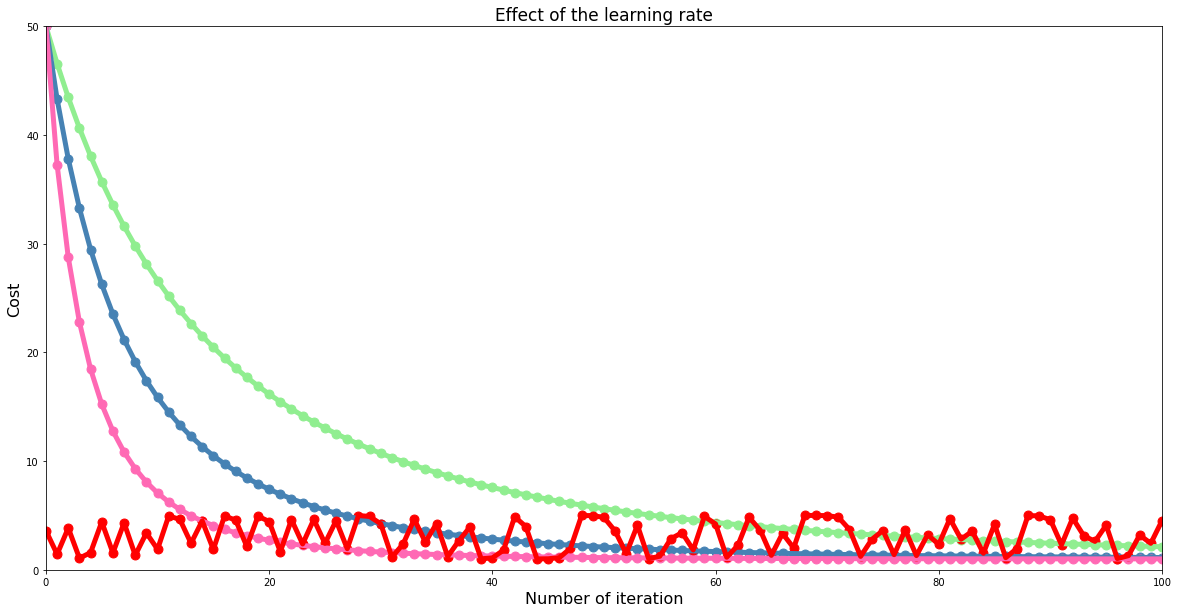

In [212]:
# Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                 multiplier=0.0005, precision=0.0001, max_iter=n)

# Challenge: Plot tow more learning rates: mind_gamma (0.001) and high_gamma(0.002)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                 multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                 multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_rate = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                 multiplier=0.25, precision=0.0001, max_iter=n)




# ploting reduction in cost for each iteration
plt.figure(figsize=[20,10])

plt.xlim([0, n])
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Number of iteration', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Value for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1 
interation_list = list(range(0, n+1))

#Plotting low learning rate
plt.plot(interation_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(interation_list, g(low_values), color='lightgreen', s=80)

#Plotting mid learning rate
plt.plot(interation_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(interation_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

#Plotting high learning rate
plt.plot(interation_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(interation_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

# Ploting insate_rate
plt.plot(interation_list, g(np.array(insane_rate[1])), color='red', linewidth=5)
plt.scatter(interation_list, g(np.array(insane_rate[1])), color='red', s=80)

plt.show()

# Example 4 - Data Voz wotj 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2-y^2}$ 

In [213]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1 / (r+1)

In [214]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid:', x_4.shape)

Shape of X array (200,)
Array after meshgrid: (200, 200)


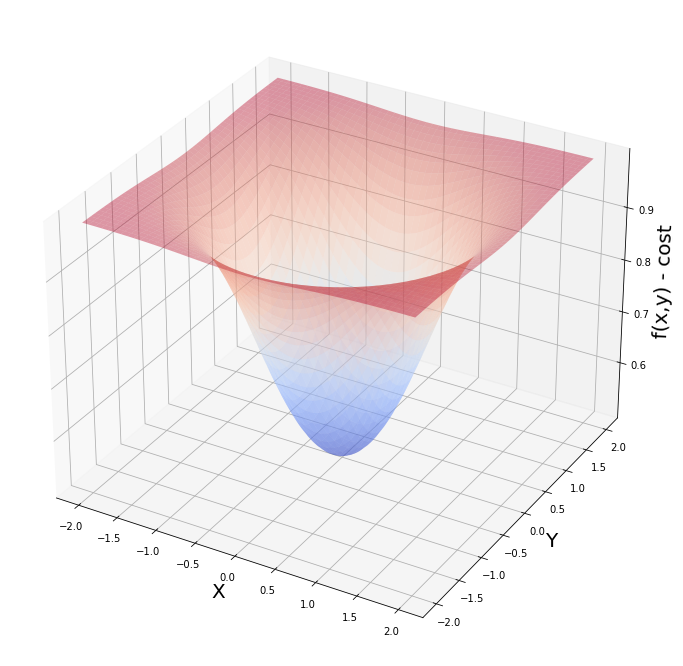

In [215]:
#Generationg 3D plot
fig = plt.figure(figsize=[16, 12])
ax= fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.coolwarm, alpha=0.4)
 
plt.show()

## Partial Derivatives & Symbolic Computation 

## $$\frac{\partial f}{\partial x}= \frac{2x\ln(3)\cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1 \right)^2}$$
## $$\frac{\partial f}{\partial y}= \frac{2y\ln(3)\cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1 \right)^2}$$

In [216]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is :' , f(a,b))
print('Partial derivative wrt x is: ',diff(f(a, b), a))
print('Value of f(x,y) at x=1.8 y=1.0 is: ', f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ',diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is : 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505


## Batch Gardient Descent with SymPy

In [217]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess for x and y

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier* gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [218]:
# Partial Derivative functions example 4

def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2

In [219]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess for x and y

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier* gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent & Advanced Numpy Arrays

In [220]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess for x and y
values_array = params.reshape(1, 2)   # Reshaping the array
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier* gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


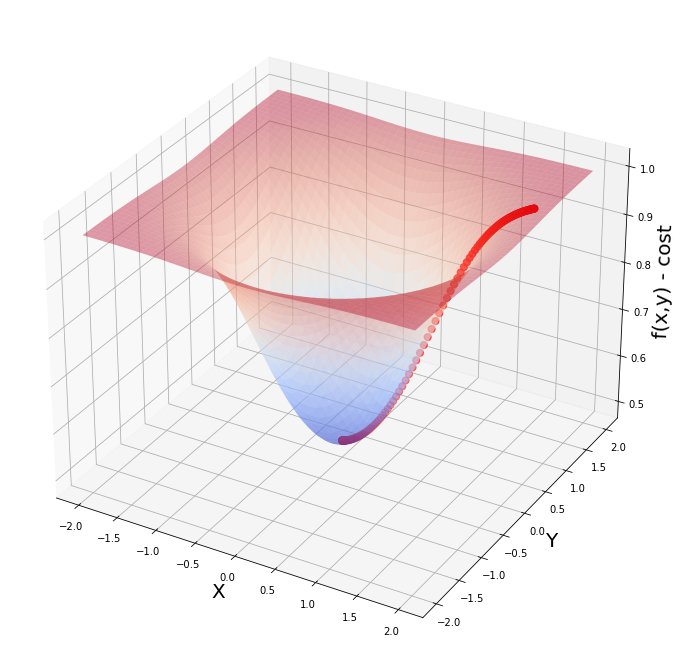

In [221]:
#Generationg 3D plot
fig = plt.figure(figsize=[16, 12])
ax= fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color='red')
 
plt.show()

# Advanced Numpy Array Practice:

In [222]:
kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band :', hs_band[0])
print('hs_band[0][1] :', hs_band[0][1])
print('hs_band[1][0] :', hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0) # Concatinating the kirk Array
#the_roots = np.append(arr=hs_band, values=kirk.reshape(2, 1), axis=1)
print(the_roots)

print('Printing nicknames...', the_roots[:,0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band : ['Black Thought' 'MC']
hs_band[0][1] : MC
hs_band[1][0] : Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing band roles... ['MC' 'Drums' 'Guitar' 'MC']


# Example5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [223]:
# Make sample data 
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose() # Convert to tow multi-dimentional arrary
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1) # Convert to tow multi-dimentional arrary

print('Shape of x_5 array:', x_5.shape)
print('Shape of Y-5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of Y-5 array: (7, 1)


In [224]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


<function matplotlib.pyplot.show(close=None, block=None)>

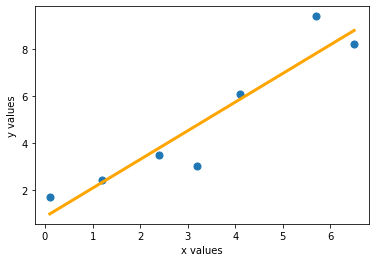

In [225]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show

In [226]:
# y_hat= theta0 + theta1*x
y_hat = 0.8475351486029536 + 1.2227264637835915*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, then actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, then actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [227]:
# Challenge: Write a python function  mse(y, y_hat) returns the MSE: Call the mse(y, y_hat)
# function and prin out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y-y_hat)**2)
    #mse_calc = (1/y.size) * sum((y-y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [228]:
print('Manually calculated MSE is: ', mse(y_5, y_hat))
print('MSE regression using manual clac is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is:  [0.94796558]
MSE regression using manual clac is 0.9479655759794577
MSE regression is 0.9479655759794577


# 3D Plot for the MSE Cost Function

## Make data for thetas

In [229]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

## Calc MSE using nested for loops

In [230]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('SHape of plot_t0',plot_t0.shape)
print('SHape of plot_t1',plot_t1.shape)
print('SHape of plot_cost',plot_cost.shape)


SHape of plot_t0 (200, 200)
SHape of plot_t1 (200, 200)
SHape of plot_cost (200, 200)


In [231]:
# Nested loop practice
for i in range(3):
    for j in range(3):
        print(f'value of i is {i} and j is {j}')

value of i is 0 and j is 0
value of i is 0 and j is 1
value of i is 0 and j is 2
value of i is 1 and j is 0
value of i is 1 and j is 1
value of i is 1 and j is 2
value of i is 2 and j is 0
value of i is 2 and j is 1
value of i is 2 and j is 2


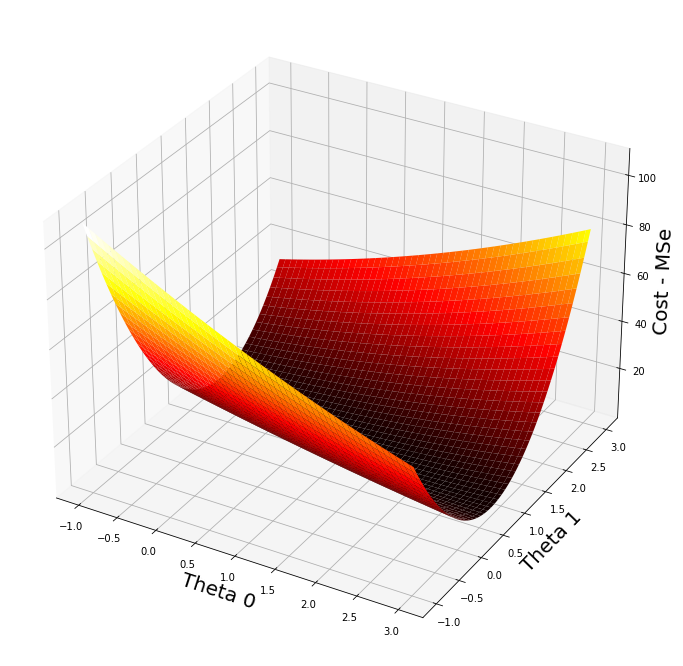

In [232]:
# Ploting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSe', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)

plt.show()  

In [233]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j): ', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j):  (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0}= -\frac{2}{n} \sum_{i=1}^n \big(y^{(i)}-\theta_0 - \theta_1x^{(i)}\big)$$

## $$\frac{\partial MSE}{\partial \theta_1}= -\frac{2}{n} \sum_{i=1}^n \big(y^{(i)}-\theta_0 - \theta_1x^{(i)}\big)
\big(x^{(i)} \big)$$

## MSE & Gradient Descent

In [234]:
# x values, y values, array of theta parameters(theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    
    # Challenge: Crate theta0_slope and heta1_slope to hold slope values from partial derivatives
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [235]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is: ', mse(y_5, thetas[0] + thetas[1] * x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is:  [0.94797511]


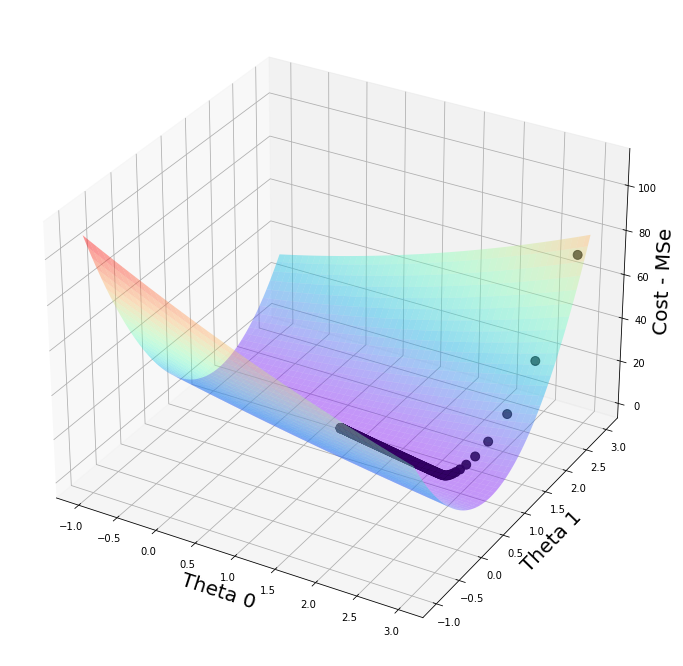

In [236]:
# Ploting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSe', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)

plt.show()  